In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import stats

In [2]:
bigDir=r'Z:\CookLab\Liu\20190816_organizedData_MCM_loading\20200615_h3k9me3'

In [3]:
file=f'{bigDir}\\cellinfo_200615v6_10percent.csv'

In [4]:
data=pd.read_csv(file)

# data visualizations for 10% - 200615

In [7]:
data=data.drop(columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','Unnamed: 0.1.1.1'])

In [8]:
data.to_csv(file)

In [9]:
data.head()

,file,original_name,movie,last frame movie position x,last frame movie position y,ab1 (MCM),ab1 ch,ab2 (heterochromatin),ab2 ch,DAPI ch,...,temp,nuc_DAPI_total,inner_DAPI_total,outer_DAPI_total,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu
0,20200615_cell_00.ciz,20200615_29_11_63x.czi,200614xy29,1781.995,159.930,H3K9Me3,1,MCM2,2,3,...,0.100000,2.906368e+09,8.883452e+08,2.018023e+09,541422545.0,187973581.0,353448964.0,2.364945e+09,700371613.0,1.664574e+09
1,20200615_cell_01.ciz,20200615_29_18_63x.czi,200614xy29,1534.667,302.703,H3K9Me3,1,MCM2,2,3,...,0.100006,2.902209e+09,8.534346e+08,2.048775e+09,542010973.0,282857622.0,259153351.0,2.360198e+09,570576978.0,1.789622e+09
2,20200615_cell_02.ciz,20200615_29_23_63x.czi,200614xy29,558.209,366.997,H3K9Me3,1,MCM2,2,3,...,0.100004,2.678936e+09,8.294657e+08,1.849470e+09,469187384.0,171664012.0,297523372.0,2.209749e+09,657801691.0,1.551947e+09
3,20200615_cell_03.ciz,20200615_29_24_63x.czi,200614xy29,1147.608,371.829,H3K9Me3,1,MCM2,2,3,...,0.100000,3.867871e+09,1.053710e+09,2.814161e+09,630177628.0,210546841.0,419630787.0,3.237694e+09,843162929.0,2.394531e+09
4,20200615_cell_04.ciz,20200615_29_31_63x.czi,200614xy29,1649.449,469.520,H3K9Me3,1,MCM2,2,3,...,0.100007,3.541353e+09,1.288501e+09,2.252852e+09,668026585.0,452944462.0,215082123.0,2.873326e+09,835556815.0,2.037770e+09


## 1.	How is heterochromtin/nucleus volume changing with molecular age?

<IPython.core.display.Javascript object>


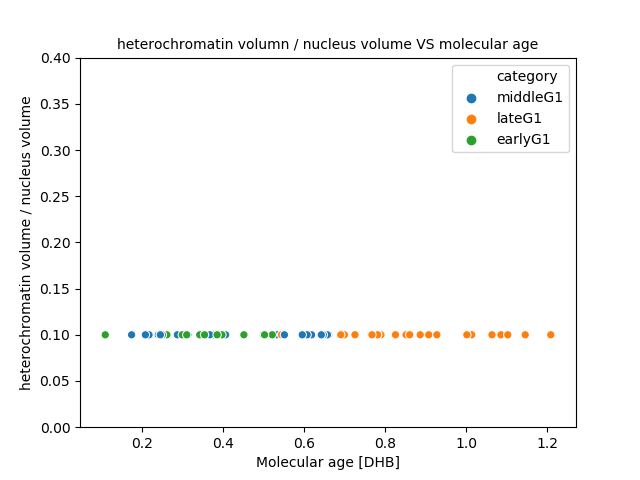

(0, 0.4)

In [10]:
%matplotlib notebook
data['temp']=data.nuc_vol_het/data.nuc_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('heterochromatin volumn / nucleus volume VS molecular age',fontsize=10)
plt.ylim(0,0.4)

## 2.	How is MCM signal changing with molecular age? 

<IPython.core.display.Javascript object>


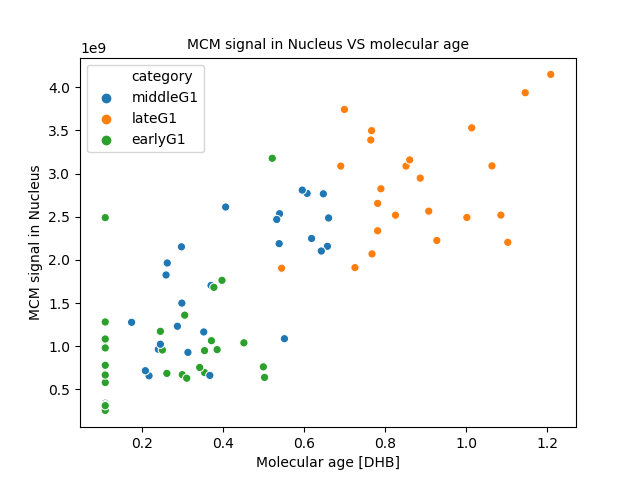

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age')

In [11]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=data.loc[(['G1' in x for x in data.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age', fontsize=10)

## 3.	How is MCM signal changing in heterochromatin with molecular age?

<IPython.core.display.Javascript object>


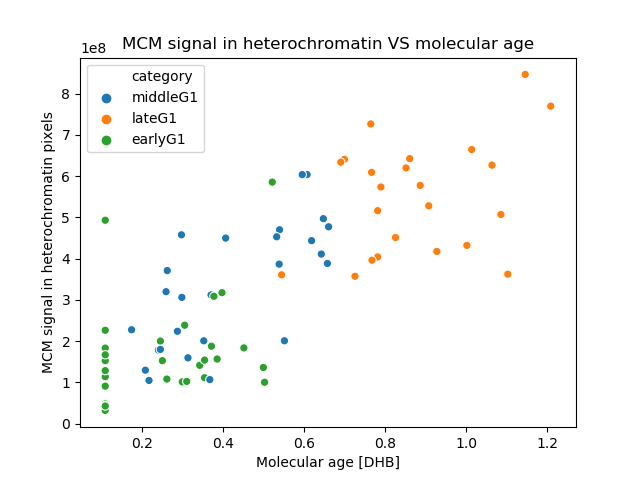

Text(0.5, 1.0, 'MCM signal in heterochromatin VS molecular age')

In [12]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_het',data=data.loc[(['G1' in x for x in data.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in heterochromatin pixels')
plt.title('MCM signal in heterochromatin VS molecular age', fontsize=12)

## 4.	How is MCM signal changing in euchromatin with molecular age?

<IPython.core.display.Javascript object>


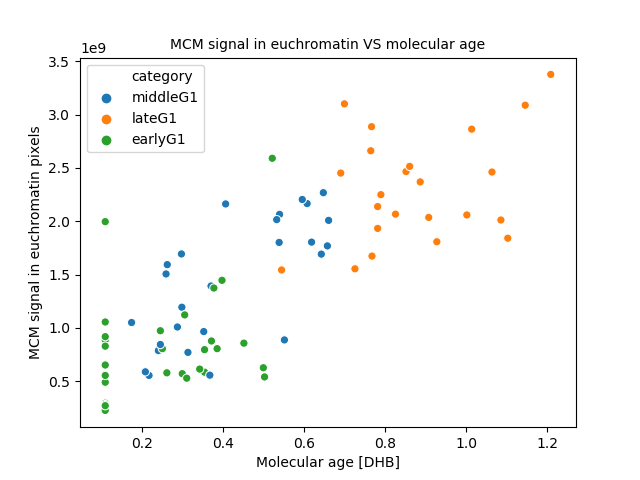

Text(0.5, 1.0, 'MCM signal in euchromatin VS molecular age')

In [13]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_eu',data=data.loc[(['G1' in x for x in data.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in euchromatin pixels')
plt.title('MCM signal in euchromatin VS molecular age', fontsize=10)

## 5.	How does a proportion of MCM loaded in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


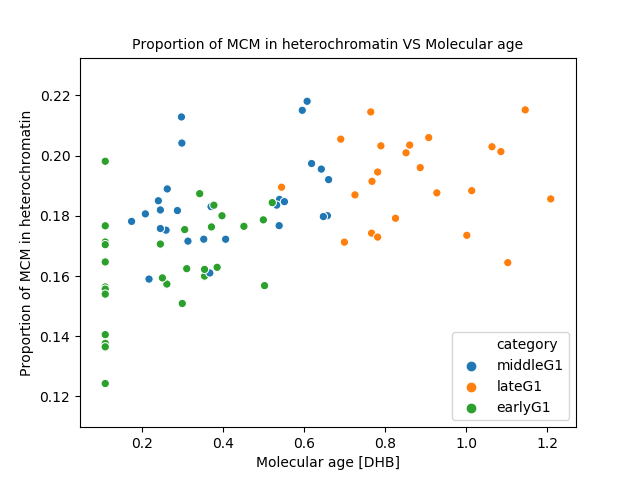

Text(0.5, 1.0, 'Proportion of MCM in heterochromatin VS Molecular age')

In [14]:
%matplotlib notebook
data['temp']=data.nuc_mcm_het/data.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in heterochromatin')
plt.title('Proportion of MCM in heterochromatin VS Molecular age', fontsize=10)

## 6.	How does a proportion of MCM loaded in euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


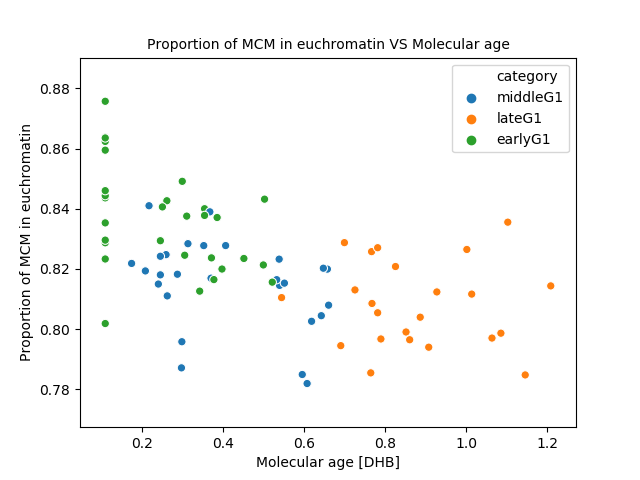

Text(0.5, 1.0, 'Proportion of MCM in euchromatin VS Molecular age')

In [15]:
%matplotlib notebook
data['temp']=data.nuc_mcm_eu/data.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=data.loc[(['G1' in x for x in data.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in euchromatin')
plt.title('Proportion of MCM in euchromatin VS Molecular age', fontsize=10)

## 7.	How does MCM/DAPI changes in molecular time?

<IPython.core.display.Javascript object>


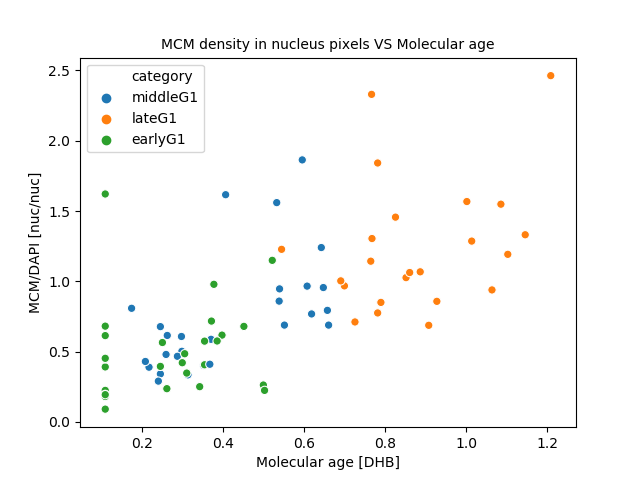

Text(0.5, 1.0, 'MCM density in nucleus pixels VS Molecular age')

In [16]:
%matplotlib notebook
data['temp']=data.nuc_mcm_total/data.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=data.loc[(['G1' in x for x in data.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [nuc/nuc]')
plt.title('MCM density in nucleus pixels VS Molecular age', fontsize=10)

## 8.	How does MCM/DAPI changes in heterochromatin molecular time?

<IPython.core.display.Javascript object>


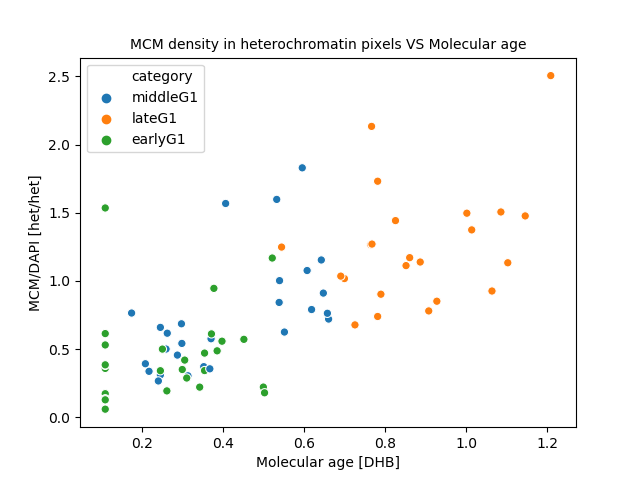

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [17]:
%matplotlib notebook
data['temp']=data.nuc_mcm_het/data.nuc_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=data.loc[(['G1' in x for x in data.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in heterochromatin pixels VS Molecular age', fontsize=10)

## 9.	How does MCM/DAPI changes in euterochromatin molecular time?

<IPython.core.display.Javascript object>


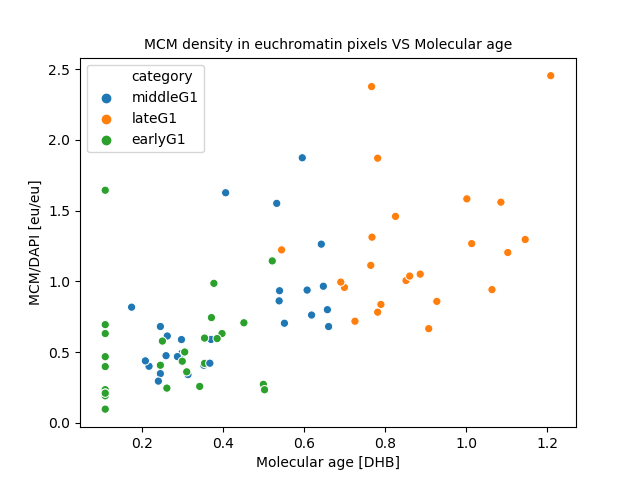

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age')

In [18]:
%matplotlib notebook
data['temp']=data.nuc_mcm_eu/data.nuc_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=data.loc[(['G1' in x for x in data.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age', fontsize=10)

## 10. How does a proportion of MCM/DAPI in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


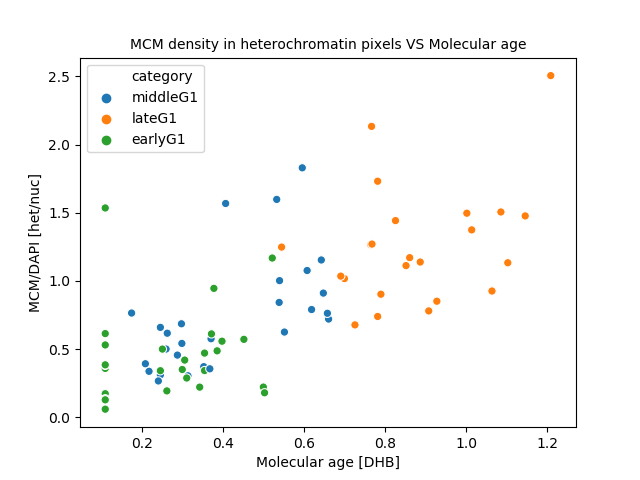

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age')

In [19]:
%matplotlib notebook
data['temp']=data.nuc_mcm_het/data.nuc_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=data.loc[(['G1' in x for x in data.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age', fontsize=10)

## 10-1. How does MCM in heterochromatin and MCM in euchromatin change with molecular age?

<IPython.core.display.Javascript object>


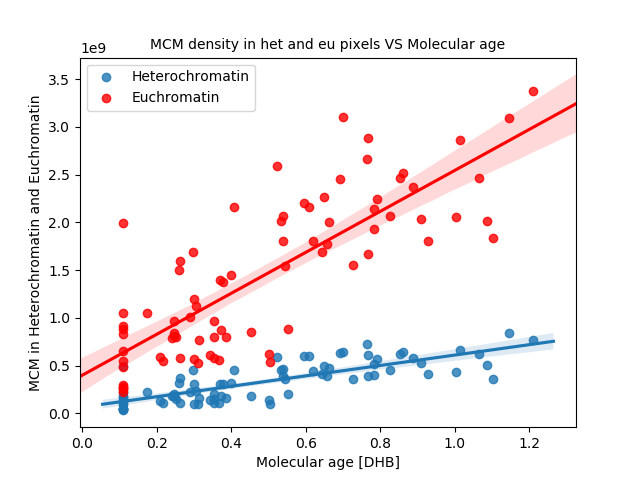

In [20]:
%matplotlib notebook
data['temp']=data.nuc_mcm_het
data['temp2']=data.nuc_mcm_eu

sn.regplot(x='mol_age_mod', y = 'temp', data=data.loc[(['G1' in x for x in data.category]),:], 
           label = 'Heterochromatin')


sn.regplot(x='mol_age_mod', y = 'temp2',data=data.loc[(['G1' in x for x in data.category]),:], 
           color="r", label = 'Euchromatin')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM in Heterochromatin and Euchromatin')
plt.title('MCM density in het and eu pixels VS Molecular age', fontsize=10)
plt.legend(loc="upper left")



## 11.  mcm/dapi in heterochromatin/nucleus pixels vs molecular age

<IPython.core.display.Javascript object>


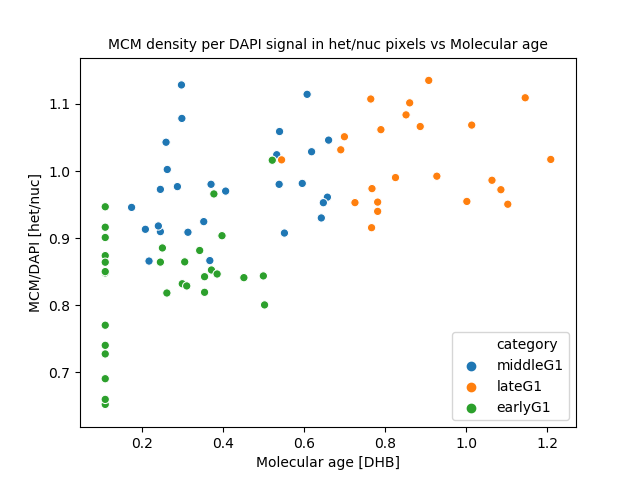

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age')

In [21]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
sn.scatterplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age', fontsize=10)

<IPython.core.display.Javascript object>


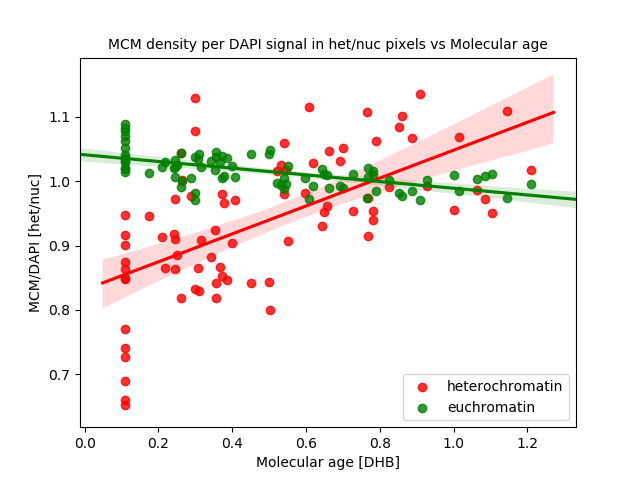

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age')

In [22]:
%matplotlib notebook
data['temp']=(data.nuc_mcm_het/data.nuc_DAPI_het)/(data.nuc_mcm_total/data.nuc_DAPI_total)
sn.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :],color='r',label='heterochromatin')

data['temp']=(data.nuc_mcm_eu/data.nuc_DAPI_eu)/(data.nuc_mcm_total/data.nuc_DAPI_total)
sn.regplot(x='mol_age_mod',y='temp',data=data.loc[(['G1' in x for x in data.category]), :], color='g', label='euchromatin')

plt.legend()
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age', fontsize=10)

# data visualizations for 50% - 200615

In [23]:
file1=f'{bigDir}\\cellinfo_200615v6_50percent.csv'
data1=pd.read_csv(file1)

In [25]:
data1=data1.drop(columns=['Unnamed: 0', 'Unnamed: 0.1.1.1'])

In [26]:
data1.to_csv(file1)

In [27]:
data1.head()

,file,original_name,movie,last frame movie position x,last frame movie position y,ab1 (MCM),ab1 ch,ab2 (heterochromatin),ab2 ch,DAPI ch,...,temp,nuc_DAPI_total,inner_DAPI_total,outer_DAPI_total,nuc_DAPI_het,inner_DAPI_het,outer_DAPI_het,nuc_DAPI_eu,inner_DAPI_eu,outer_DAPI_eu
0,20200615_cell_00.ciz,20200615_29_11_63x.czi,200614xy29,1781.995,159.930,H3K9Me3,1,MCM2,2,3,...,0.500027,2.906368e+09,8.883452e+08,2.018023e+09,2.195022e+09,8.570760e+08,1.337946e+09,711346064.0,31269198.0,680076866.0
1,20200615_cell_01.ciz,20200615_29_18_63x.czi,200614xy29,1534.667,302.703,H3K9Me3,1,MCM2,2,3,...,0.500021,2.902209e+09,8.534346e+08,2.048775e+09,2.158831e+09,8.308982e+08,1.327933e+09,743378611.0,22536363.0,720842248.0
2,20200615_cell_02.ciz,20200615_29_23_63x.czi,200614xy29,558.209,366.997,H3K9Me3,1,MCM2,2,3,...,0.500000,2.678936e+09,8.294657e+08,1.849470e+09,1.975732e+09,8.043897e+08,1.171342e+09,703204338.0,25076034.0,678128304.0
3,20200615_cell_03.ciz,20200615_29_24_63x.czi,200614xy29,1147.608,371.829,H3K9Me3,1,MCM2,2,3,...,0.500002,3.867871e+09,1.053710e+09,2.814161e+09,2.869494e+09,1.028024e+09,1.841470e+09,998376893.0,25685695.0,972691198.0
4,20200615_cell_04.ciz,20200615_29_31_63x.czi,200614xy29,1649.449,469.520,H3K9Me3,1,MCM2,2,3,...,0.500024,3.541353e+09,1.288501e+09,2.252852e+09,2.582704e+09,1.268266e+09,1.314439e+09,958648758.0,20235773.0,938412985.0


## 1.	How is heterochromtin/nucleus volume changing with molecular age?

<IPython.core.display.Javascript object>


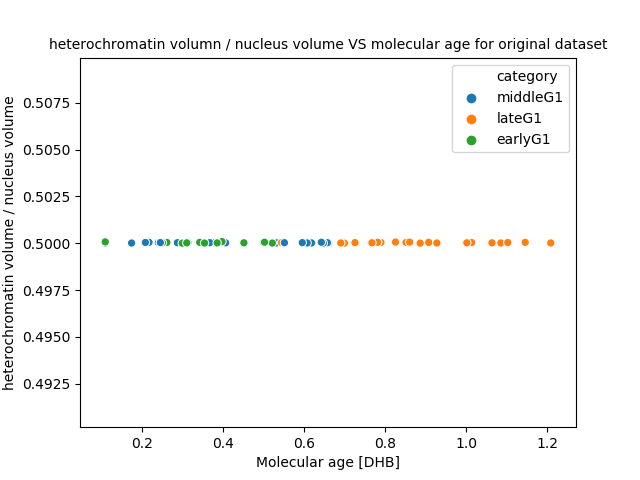

Text(0.5, 1.0, 'heterochromatin volumn / nucleus volume VS molecular age for original dataset')

In [29]:
%matplotlib notebook
data1['temp']=data1.nuc_vol_het/data1.nuc_vol_total
sn.scatterplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('heterochromatin volume / nucleus volume')
plt.title('heterochromatin volumn / nucleus volume VS molecular age for original dataset',fontsize=10)

## 2.	How is MCM signal changing with molecular age? 

<IPython.core.display.Javascript object>


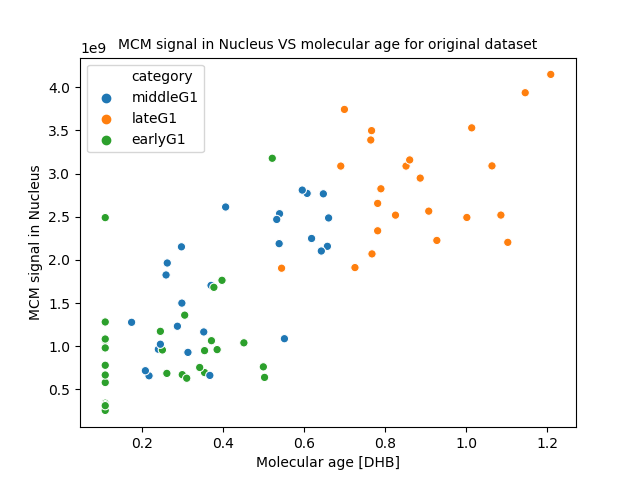

Text(0.5, 1.0, 'MCM signal in Nucleus VS molecular age for original dataset')

In [30]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_total',data=data1.loc[(['G1' in x for x in data1.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in Nucleus')
plt.title('MCM signal in Nucleus VS molecular age for original dataset', fontsize=10)

## 3.	How is MCM signal changing in heterochromatin with molecular age?

<IPython.core.display.Javascript object>


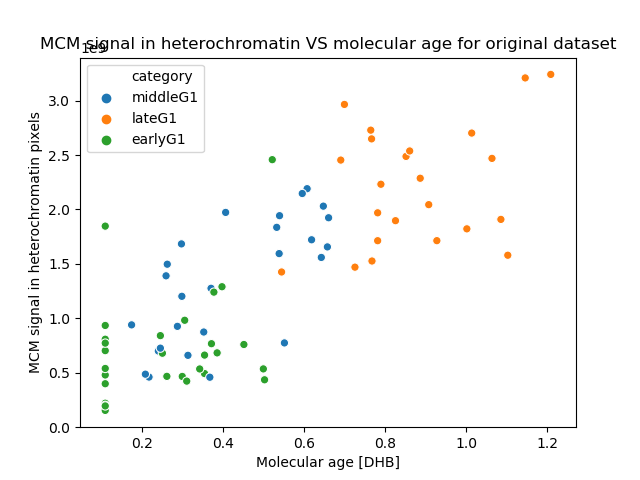

Text(0.5, 1.0, 'MCM signal in heterochromatin VS molecular age for original dataset')

In [31]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_het',data=data1.loc[(['G1' in x for x in data1.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in heterochromatin pixels')
plt.title('MCM signal in heterochromatin VS molecular age for original dataset', fontsize=12)

## 4.	How is MCM signal changing in euchromatin with molecular age?

<IPython.core.display.Javascript object>


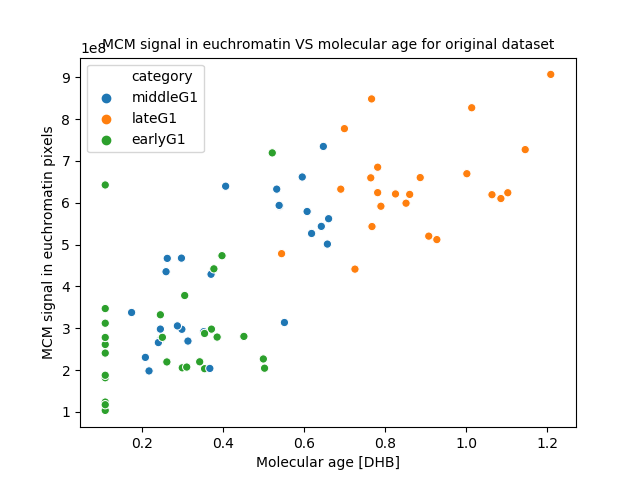

Text(0.5, 1.0, 'MCM signal in euchromatin VS molecular age for original dataset')

In [32]:
%matplotlib notebook

sn.scatterplot(x='mol_age_mod',y='nuc_mcm_eu',data=data1.loc[(['G1' in x for x in data1.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM signal in euchromatin pixels')
plt.title('MCM signal in euchromatin VS molecular age for original dataset', fontsize=10)

## 5.	How does a proportion of MCM loaded in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


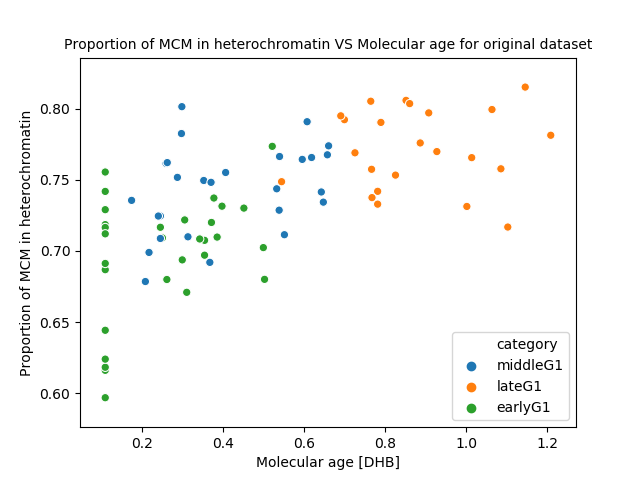

Text(0.5, 1.0, 'Proportion of MCM in heterochromatin VS Molecular age for original dataset')

In [33]:
%matplotlib notebook
data1['temp']=data1.nuc_mcm_het/data1.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in heterochromatin')
plt.title('Proportion of MCM in heterochromatin VS Molecular age for original dataset', fontsize=10)


## 6.	How does a proportion of MCM loaded in euchromatin changes with molecular age?

<IPython.core.display.Javascript object>


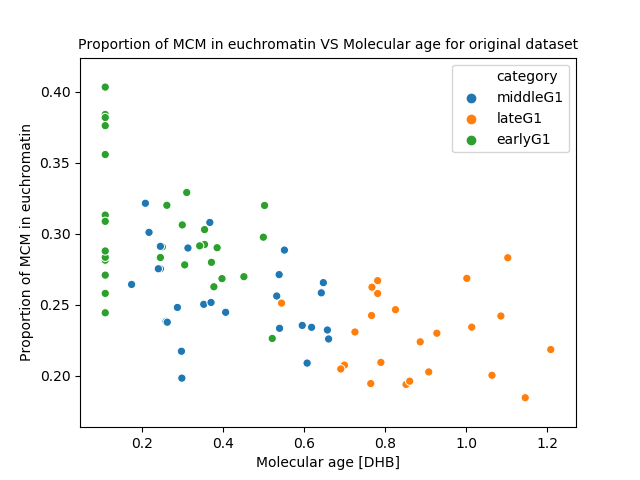

Text(0.5, 1.0, 'Proportion of MCM in euchromatin VS Molecular age for original dataset')

In [34]:
%matplotlib notebook
data1['temp']=data1.nuc_mcm_eu/data1.nuc_mcm_total

sn.scatterplot(x='mol_age_mod',y='temp', data=data1.loc[(['G1' in x for x in data1.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('Proportion of MCM in euchromatin')
plt.title('Proportion of MCM in euchromatin VS Molecular age for original dataset', fontsize=10)


## 7.	How does MCM/DAPI changes in molecular time?

<IPython.core.display.Javascript object>


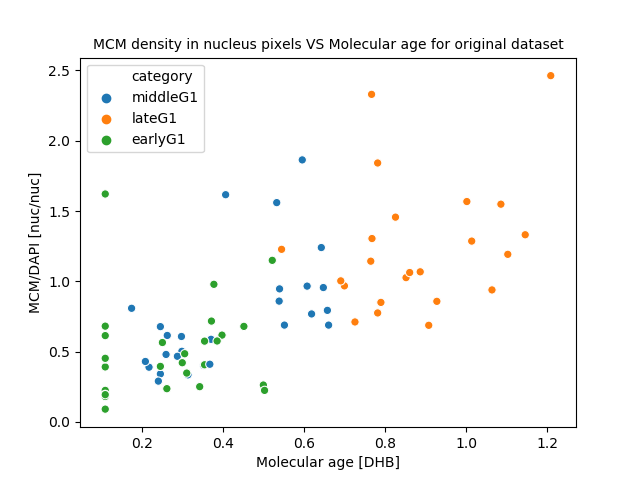

Text(0.5, 1.0, 'MCM density in nucleus pixels VS Molecular age for original dataset')

In [35]:
%matplotlib notebook
data1['temp']=data1.nuc_mcm_total/data1.nuc_DAPI_total

sn.scatterplot(x='mol_age_mod',y='temp', data=data1.loc[(['G1' in x for x in data1.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [nuc/nuc]')
plt.title('MCM density in nucleus pixels VS Molecular age for original dataset', fontsize=10)

## 8.	How does MCM/DAPI changes in heterochromatin molecular time?

<IPython.core.display.Javascript object>


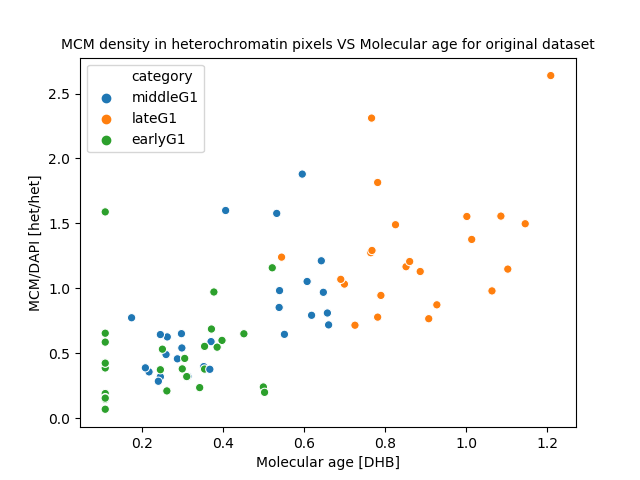

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age for original dataset')

In [36]:
%matplotlib notebook
data1['temp']=data1.nuc_mcm_het/data1.nuc_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=data1.loc[(['G1' in x for x in data1.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/het]')
plt.title('MCM density in heterochromatin pixels VS Molecular age for original dataset', fontsize=10)

## 9.	How does MCM/DAPI changes in euterochromatin molecular time?

<IPython.core.display.Javascript object>


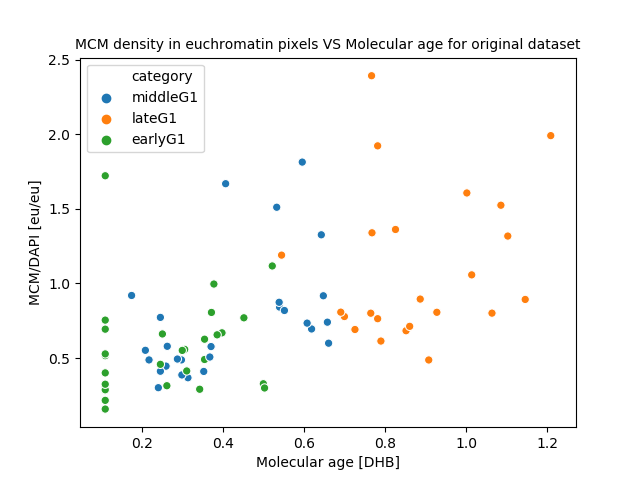

Text(0.5, 1.0, 'MCM density in euchromatin pixels VS Molecular age for original dataset')

In [37]:
%matplotlib notebook
data1['temp']=data1.nuc_mcm_eu/data1.nuc_DAPI_eu

sn.scatterplot(x='mol_age_mod',y='temp', data=data1.loc[(['G1' in x for x in data1.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [eu/eu]')
plt.title('MCM density in euchromatin pixels VS Molecular age for original dataset', fontsize=10)

## 10. How does a proportion of MCM/DAPI in heterochromatin changes with molecular age?

<IPython.core.display.Javascript object>


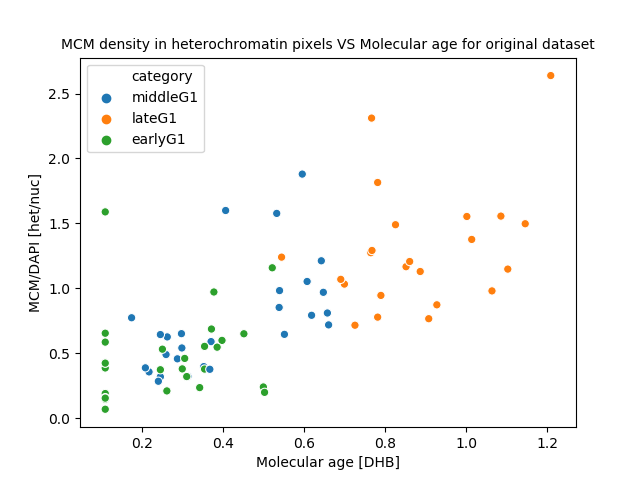

Text(0.5, 1.0, 'MCM density in heterochromatin pixels VS Molecular age for original dataset')

In [38]:
%matplotlib notebook
data1['temp']=data1.nuc_mcm_het/data1.nuc_DAPI_het

sn.scatterplot(x='mol_age_mod',y='temp', data=data1.loc[(['G1' in x for x in data1.category]),:],hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density in heterochromatin pixels VS Molecular age for original dataset', fontsize=10)

## 10-1. How does MCM in heterochromatin and MCM in euchromatin change with molecular age?

<IPython.core.display.Javascript object>


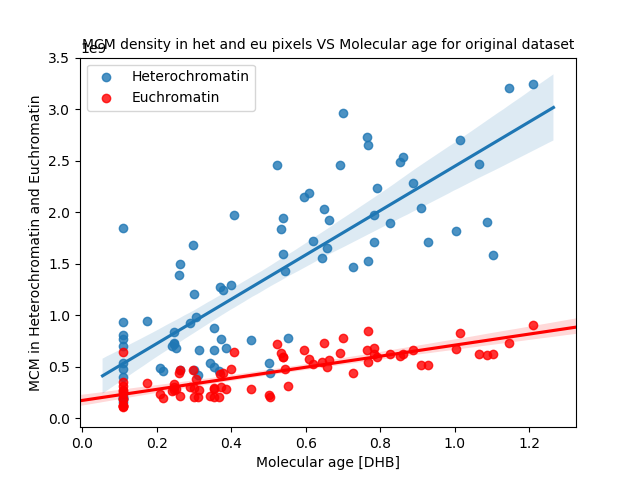

In [39]:
%matplotlib notebook
data1['temp']=data1.nuc_mcm_het
data1['temp2']=data1.nuc_mcm_eu

sn.regplot(x='mol_age_mod', y = 'temp', data=data1.loc[(['G1' in x for x in data1.category]),:], 
           label = 'Heterochromatin')


sn.regplot(x='mol_age_mod', y = 'temp2',data=data1.loc[(['G1' in x for x in data1.category]),:], 
           color="r", label = 'Euchromatin')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM in Heterochromatin and Euchromatin')
plt.title('MCM density in het and eu pixels VS Molecular age for original dataset', fontsize=10)
plt.legend(loc="upper left")



## 11.  mcm/dapi in heterochromatin/nucleus pixels vs molecular age

<IPython.core.display.Javascript object>


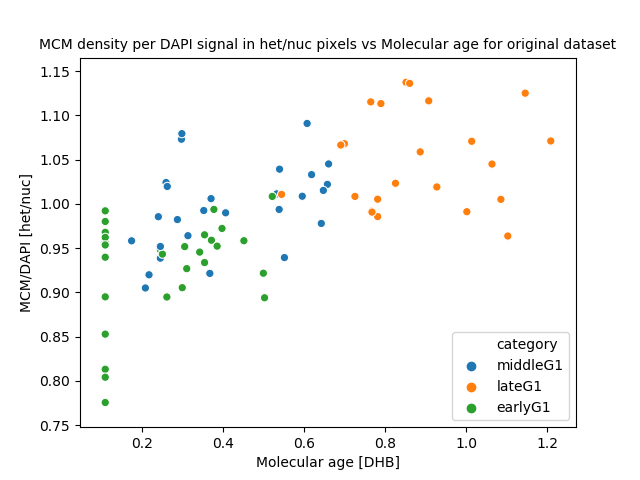

Text(0.5, 1.0, 'MCM density per DAPI signal in het/nuc pixels vs Molecular age for original dataset')

In [40]:
%matplotlib notebook
data1['temp']=(data1.nuc_mcm_het/data1.nuc_DAPI_het)/(data1.nuc_mcm_total/data1.nuc_DAPI_total)
sn.scatterplot(x='mol_age_mod',y='temp',data=data1.loc[(['G1' in x for x in data1.category]), :], hue='category')
plt.xlabel('Molecular age [DHB]')
plt.ylabel('MCM/DAPI [het/nuc]')
plt.title('MCM density per DAPI signal in het/nuc pixels vs Molecular age for original dataset', fontsize=10)

Plot #11 for H3K9Me3 groups show different slopes. The following plot will plot these two plots in one figutre.